<a href="https://colab.research.google.com/github/Elian19-01/Massive-data/blob/main/Project_Unit_1_DM_Elian_Vega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 1 Data Mining Project

You will be loading a dataset from Kansas City House Prices.
Knock your self out with what you've learnt.
The dataset is called "kc_house_data.csv"

In [1]:
# load libraries before using any function
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pylab 
import scipy.stats as stats

In [2]:
# read in the dataset and get columns name 
df = pd.read_csv('/content/kc_house_data.csv')
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Select some columns you may think are useful for example `['price','bedrooms','bathrooms','sqft_living','yr_built']`

In [3]:
# create new data frame by selecting some columns from original data set
dataset = df[['price','bedrooms','bathrooms','sqft_living','yr_built']]

# and obtain a summary of the new data frame 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   yr_built     21613 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [4]:
# get statistics and value counts to find outliers and potential bad data in the new data frame
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1971.005136
std,3.671272e+05,0.930062,0.770163,918.440897,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,2015.000000


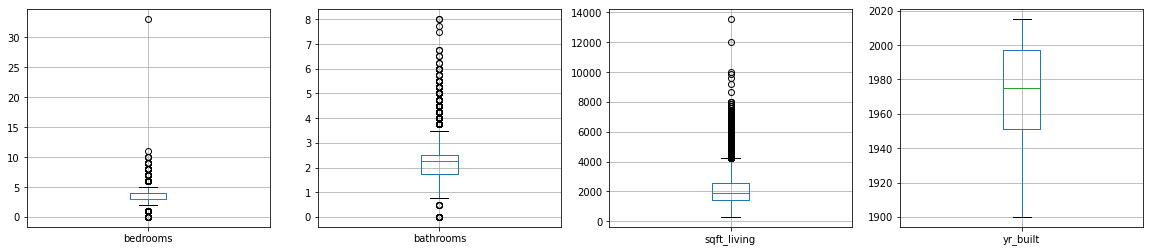

In [5]:
fig, ax=plt.subplots(1, 4, figsize=(20, 4))
dataset.boxplot(column=["bedrooms"], ax=ax[0])
dataset.boxplot(column=["bathrooms"], ax=ax[1])
dataset.boxplot(column=["sqft_living"],ax=ax[2])
dataset.boxplot(column=["yr_built"], ax=ax[3])
plt.show()


In [6]:
# cleaning data by dropping rows for what the number of 'bedrooms' is equal to zero, considered as bad data
dataset = dataset[dataset.bedrooms != 0 ]
# cleaning data by dropping the row for what number of 'bedrooms' is below to '33', considered as potential oulier
dataset = dataset[dataset.bedrooms < 33 ]
# cleaning data by dropping rows for what the number of 'bathrooms' is equal to zero, considered as bad data
dataset = dataset[dataset.bathrooms != 0 ]
# cleaning data by dropping the row for what number of 'bathrooms' is below to '7', considered as potential oulier
dataset = dataset[dataset.bathrooms < 7 ]
# obtain a new summary of the data frame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21592 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21592 non-null  float64
 1   bedrooms     21592 non-null  int64  
 2   bathrooms    21592 non-null  float64
 3   sqft_living  21592 non-null  int64  
 4   yr_built     21592 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1012.1 KB


In [7]:
# get statistics and value counts to find outliers and potential bad data in the new data frame
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,yr_built
count,2.159200e+04,21592.000000,21592.000000,21592.000000,21592.000000
mean,5.394965e+05,3.371156,2.114788,2078.897786,1970.999768
std,3.611621e+05,0.902694,0.765145,910.720493,29.373428
min,7.800000e+04,1.000000,0.500000,370.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1997.000000
max,7.062500e+06,11.000000,6.750000,10040.000000,2015.000000


In [8]:
# visually inspect the first five rows of the new data frame
dataset.head()

,price,bedrooms,bathrooms,sqft_living,yr_built
0,221900.0,3,1.00,1180,1955
1,538000.0,3,2.25,2570,1951
2,180000.0,2,1.00,770,1933
3,604000.0,4,3.00,1960,1965
4,510000.0,3,2.00,1680,1987


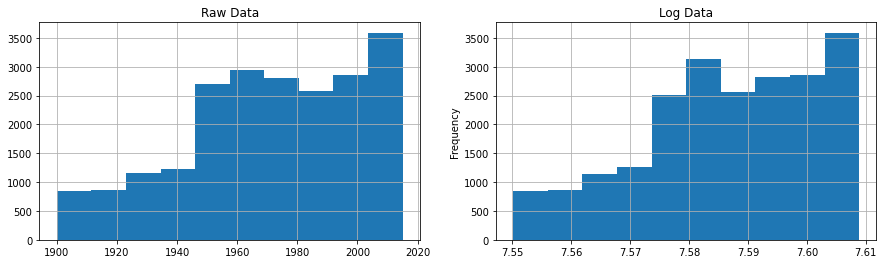

<Figure size 432x288 with 0 Axes>

In [9]:
# draw a histogram plot based on' year built' of the new data frame
fig, ax=plt.subplots(1, 2, figsize=(15, 4))
dataset.yr_built.hist(ax=ax[0])
ax[0].set_title("Raw Data")
np.log1p(dataset.yr_built).plot.hist(ax=ax[1],grid=True)
ax[1].set_title("Log Data")
plt.show()
plt.clf()

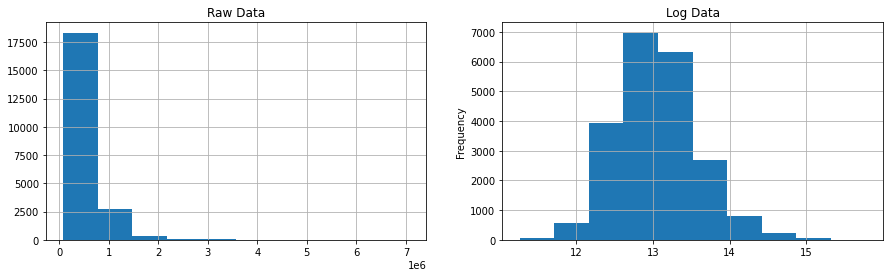

<Figure size 432x288 with 0 Axes>

In [10]:
# Price
fig, ax=plt.subplots(1, 2, figsize=(15, 4))
dataset.price.hist(ax=ax[0])
ax[0].set_title("Raw Data")
np.log1p(dataset.price).plot.hist(ax=ax[1],grid=True)
ax[1].set_title("Log Data")
plt.show()
plt.clf()

In [11]:
# draw a scatter plot for each data frame based on 'number of bedrooms' to see the difference
fig, ax=plt.subplots(1, 2, figsize=(15, 4))
dataset.plot(kind='scatter', x='bedrooms', y='price', ax=ax[0])
ax[0].set_title("Sin Outliers")
df.plot(kind='scatter', x='bedrooms', y='price',ax=ax[1])
ax[1].set_title("Con Outliers")
plt.clf()

<Figure size 1080x288 with 0 Axes>

Text(0.5, 1.0, 'Con Outliers')

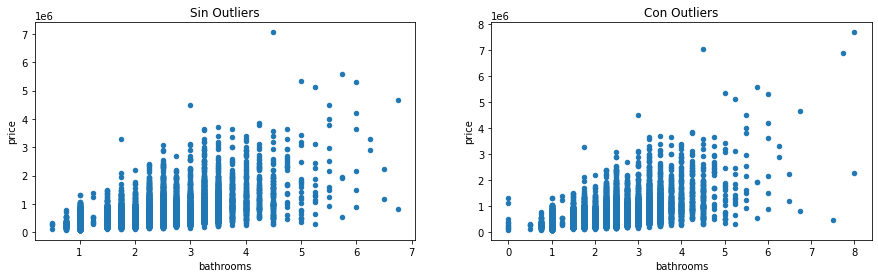

In [12]:
# draw a scatter plot for each data frame based on 'number of bathrooms' to see the difference
fig, ax=plt.subplots(1, 2, figsize=(15, 4))
dataset.plot(kind='scatter', x='bathrooms', y='price', ax=ax[0])
ax[0].set_title("Sin Outliers")
df.plot(kind='scatter', x='bathrooms', y='price',ax=ax[1])
ax[1].set_title("Con Outliers")

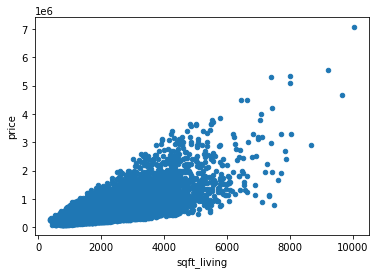

In [13]:
# draw a scatter plot based on 'square footage of the home' of the new data frame
dataset.plot(kind='scatter', x='sqft_living', y='price')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f584c21d710>,
      dtype=object)

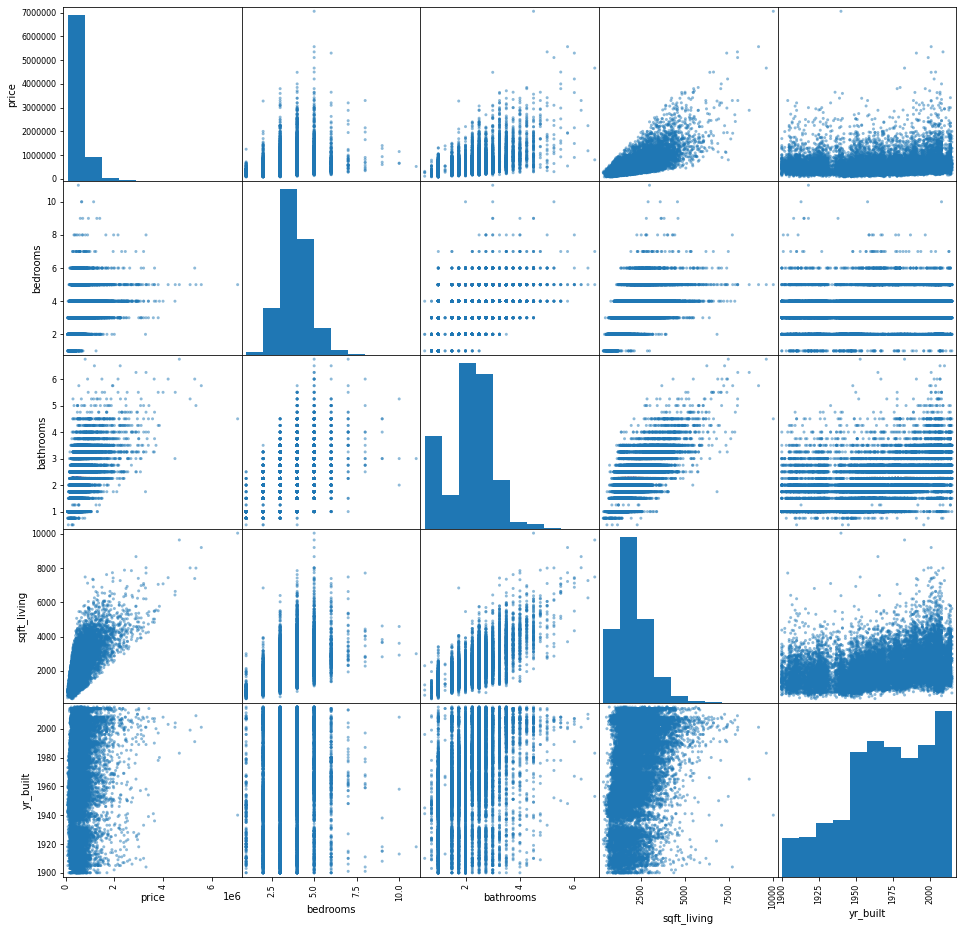

In [14]:
# draw a matrix of scatter plots of the data set in a shape of 16" width x 16" height
# to roughly determine if there is a linear correlation between multiple variables
pd.plotting.scatter_matrix(dataset, figsize=(16,16))

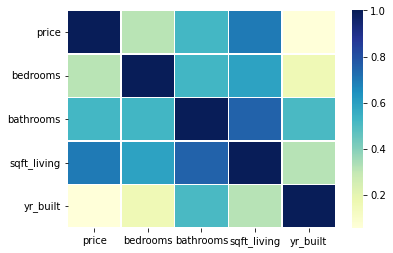

In [15]:
# Correlation and Heatmap
import seaborn as sns 
matrix = dataset.corr()
sns.heatmap(matrix,linewidths=.5, cmap="YlGnBu")

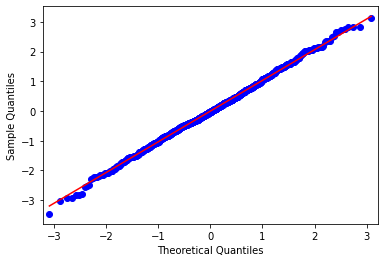

In [16]:
# include the QQ norm to see if residuals are normal
residuals = np.random.normal(0,1, 1000)
# using 's' to get scaled line by the standard deviation and mean added) 
sm.qqplot(residuals, line='s')
pylab.show()

Extra points if you can figure this out.
Just google how to do an OLS in Python provide X and Y.
X is the target or the house price
Y is the features or columns being used to predict the house price or X. I recommended using `['bedrooms','bathrooms','sqft_living','yr_built']` but you can use whatever you think it might help. 

**What is the use of statsmodels API in Python?**

statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator.


**Why do we use add_constant?**
**Answer:** statsmodels however provides a convenience function calledadd_constant that adds a constantcolumn to input data set. Answer:By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept. Hence, you need to use thecommand 'add_constant' so that it also fits an intercept.

In [17]:
# construct the regression model using the Ordinary Least Squares (OLS) function
# This is the target column or the Price. That is waht we are trying to predict
Y=dataset.price 
# These are the features you've selected to be able to predict the price of the house. 
X=dataset[['bedrooms','bathrooms','sqft_living','yr_built']]
# This is a commons thing in this Algorithm.
X=sm.add_constant(X)
# You may want to print some rows and see what happened here
print(X)

model=sm.OLS(Y,X).fit()
predictions=model.predict(X)
model.summary()

       const  bedrooms  bathrooms  sqft_living  yr_built
0        1.0         3       1.00         1180      1955
1        1.0         3       2.25         2570      1951
2        1.0         2       1.00          770      1933
3        1.0         4       3.00         1960      1965
4        1.0         3       2.00         1680      1987
...      ...       ...        ...          ...       ...
21608    1.0         3       2.50         1530      2009
21609    1.0         4       2.50         2310      2014
21610    1.0         2       0.75         1020      2009
21611    1.0         3       2.50         1600      2004
21612    1.0         2       0.75         1020      2008

[21592 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     6563.
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:08:16   Log-Likelihood:            -2.9836e+05
No. Observations:               21592   AIC:                         5.967e+05
Df Residuals:                   21587   BIC:                         5.968e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         5.97e+06   1.28e+05     46.463      0.000    5.72e+06    6.22e+06
bedrooms    -7.439e+04   2313.586    -32.155      0.000   -7.89e+04   -6.99e+04
bathrooms    8.304e+04   3701.320     22.436      0.000    7.58e+04    9.03e+04
sqft_living   300.0128      2.955    101.527      0.000     294.221     305.805
yr_built    -3033.2588     66.191    -45.826      0.000   -3162.997   -2903.521
==============================================================================
Omnibus:                    12947.182   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           336617.613
Skew:                           2.418   Prob(JB):                         0.00
Kurtosis:                      21.729   Cond. No.                     2.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

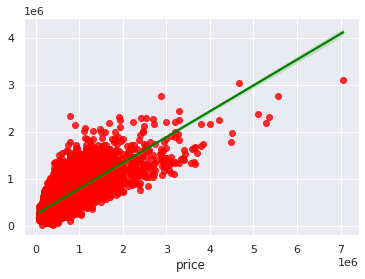

In [18]:
# Visualize Predictions vs Real data
import seaborn as sns
sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")
ax = sns.regplot(x=Y, y=predictions, scatter_kws={"color": "red"}, line_kws={"color": "green"})

#Write your conclusions.
#What do yu see?

If we have more quantity in the features the house sale price affected gets higher. For example, if we have more bedrooms the price of the house will increase, and viceversa.

the house sale price increases in 74390 in the number of bedrooms and increases in 83040 for unit in the number of bathrooms

the house sale price increases 300.01 for each squared feet more
